In [4]:
pip install pandas-datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [13]:
#getting the libraries thats required
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#seaborn-Seaborn is a library for making statistical graphics in Python.
#It builds on top of matplotlib and integrates closely with pandas data structures.
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [14]:
#lets consider the conglomerate firm APPLE stocks
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())


# display the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466090,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533086,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672229,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804701,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784391,394024400
...,...,...,...,...,...,...
2023-09-05,188.279999,189.979996,187.610001,189.699997,189.699997,45280000
2023-09-06,188.399994,188.850006,181.470001,182.910004,182.910004,81755800
2023-09-07,175.179993,178.210007,173.539993,177.559998,177.559998,112488800


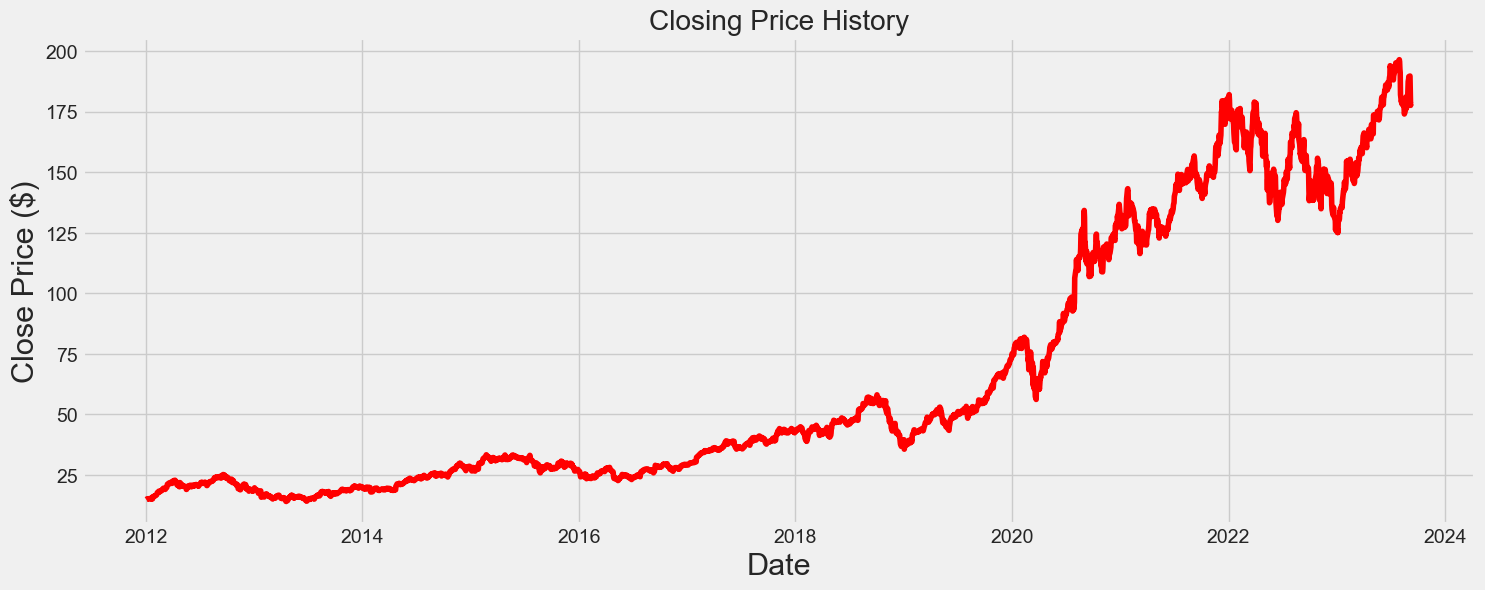

In [15]:
# among the various fields lets consider closing price of the stocks and plot a line graph
plt.figure(figsize=(16,6))
plt.title('Closing Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=22)
plt.ylabel('Close Price ($)', fontsize=22)
plt.show()

In [16]:
#filtering out the column closing stock price
data = df.filter(['Close'])

In [17]:
#convert the filtered the dataframe to a numpy array
dataset = data.values

#get the number of rows to train the model
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len


2794

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00405082],
       [0.0044833 ],
       [0.00538153],
       ...,
       [0.89649457],
       [0.89989176],
       [0.8985225 ]])

In [19]:
#create the training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00582575, 0.00721712, 0.00584728,
       0.01098419, 0.01058694, 0.01110552, 0.01222684, 0.01290588,
       0.01284914, 0.01263975, 0.0135321 , 0.01437162, 0.01532269,
       0.01685887, 0.02008583, 0.02013475, 0.02193121, 0.02327365,
       0.02096645, 0.02185489, 0.02183728, 0.02432844, 0.02397423,
       0.02462979, 0.02580786, 0.02646344, 0.02835186, 0.02972757,
       0.03012483, 0.03026377, 0.02791156, 0.02734404, 0.0274282 ,
       0.02963952, 0.03026182, 0.0315984 , 0.03474903, 0.0389525 ,
       0.03816582, 0.03816777, 0.04120687, 0.04215794, 0.04148084,
       0.04086246, 0.04021863, 0.04235754, 0.04382523, 0.04443971])]
[0.04292113229660477]

[array([0.00405082, 0.0044833 , 0.00538153, 0.0062367 , 0.00610559,
       0.00640108, 0.00626606, 0.00603905, 0.00572986, 0.0066868 ,
       0.0075498 , 0.00728366, 0.00

In [21]:
pip install keras

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.7 MB 6.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.7 MB 7.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.7 MB 8.4 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 8.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install tensorflow

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# building the LSTM model ( long short-term memory networks)
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compilation
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2734/2734 [==============================] - 44s 15ms/step - loss: 0.0013


In [26]:
# testing data set
# new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 13ms/step


4.549405842336224

C:\Users\Nithya Kumar\AppData\Local\Temp\ipykernel_20776\4275769452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


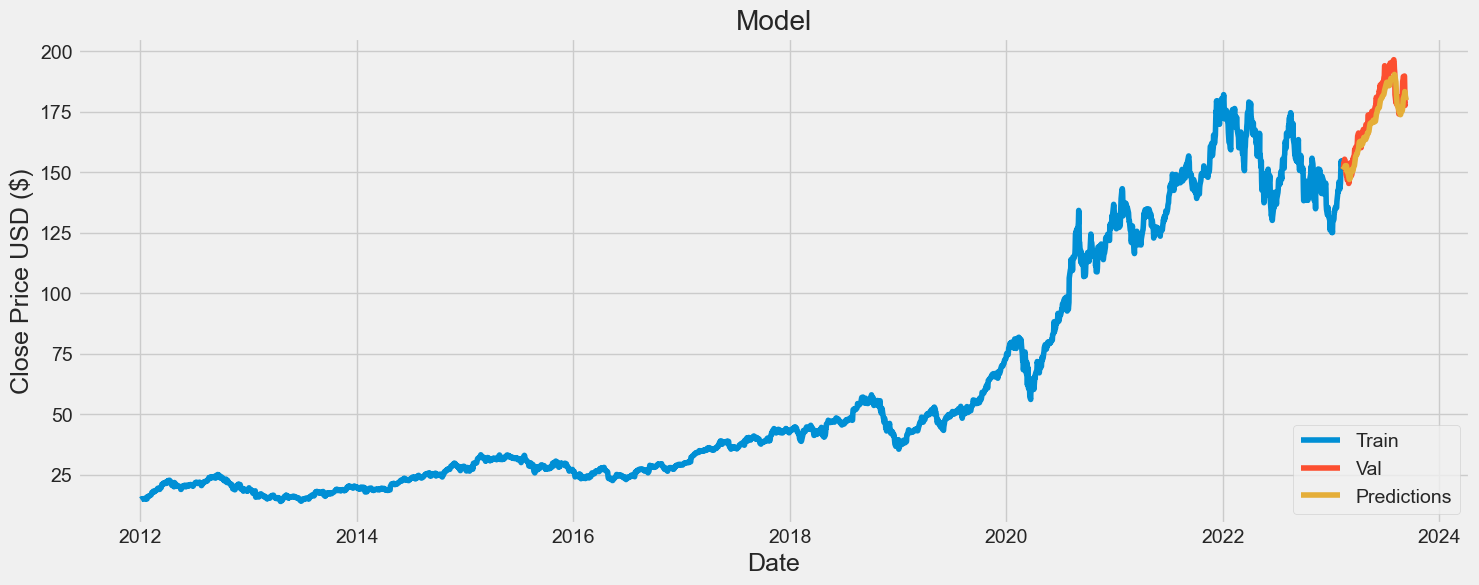

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Plot the graph for the data processed (visualisation)
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
#lets print the valid price of the stock and the prediction prices
valid

,Close,Predictions
Date,,
2023-02-09,150.869995,151.050339
2023-02-10,151.009995,151.216446
2023-02-13,153.850006,151.120483
2023-02-14,153.199997,151.402817
2023-02-15,155.330002,151.683548
...,...,...
2023-09-05,189.699997,181.952454
2023-09-06,182.910004,183.266022
2023-09-07,177.559998,183.083084
